In [1]:

#Importing libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sn
from sklearn.metrics import mean_squared_error



In [2]:
# Importing excel file 

path = os.getcwd()
df = pd.read_excel(path +"\winequality-red.xlsx")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Showing correlation between each attributes and the output

correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


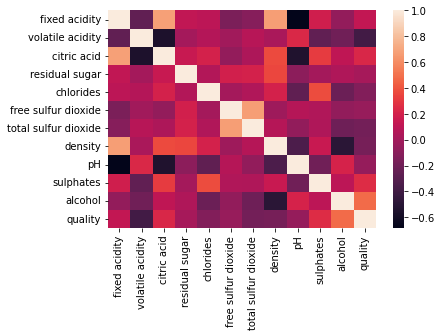

In [4]:
# Plotting heatmap to show the correlation

sn.heatmap(df.corr())
plt.show()

In [5]:
# Using only those columns whole correlation factor is greater than 0.05

abs_corr = correlations.abs()
high_correlations =abs_corr[abs_corr > 0.05].index.values.tolist()
high_correlations
abs_corr

    

fixed acidity           0.124052
volatile acidity        0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides               0.128907
free sulfur dioxide     0.050656
total sulfur dioxide    0.185100
density                 0.174919
pH                      0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

In [6]:
#Setting  x and y before test ,train split

x = df[high_correlations]
y =df['quality']
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [7]:
#Splittimg data into test and training sets 

x_train,x_test,y_train,y_test = train_test_split(x,y ,random_state=3)


In [8]:
# Fitting linear regression to training data 

regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [9]:
# Coefficient of features 

regressor.coef_

array([ 0.01773723, -0.99256049, -0.13962865, -1.59094279,  0.00559652,
       -0.00351973,  0.76859036, -0.43741414,  0.81288805,  0.30148385])

In [10]:
# Prediction quality if traianing dataset 

train_pred = regressor.predict(x_train)
train_pred

array([5.33777144, 5.33826411, 5.9503318 , ..., 6.3903182 , 6.19979375,
       5.27597259])

In [11]:
# Predicting quality of test dataset

test_pred = regressor.predict(x_test)
test_pred

array([5.10801475, 5.65933623, 5.90407267, 6.13461179, 5.00611866,
       5.44514691, 5.05735245, 6.15497513, 5.51919603, 5.77259374,
       5.61809366, 5.23616173, 5.23544213, 5.31968644, 6.47007277,
       5.043404  , 5.85287121, 5.19427909, 6.07727089, 6.34949018,
       6.42525555, 5.51221957, 5.8030796 , 4.93637817, 5.16618356,
       5.48255293, 5.13758624, 6.60000969, 5.88754763, 5.74133915,
       6.09716961, 6.29379754, 4.91269821, 5.88611904, 5.11007273,
       5.94574773, 6.80685536, 5.04305653, 5.25438683, 5.88611904,
       5.17406542, 4.84008442, 6.48781656, 5.40521715, 5.31105571,
       5.84484462, 5.7100681 , 5.24300809, 5.25021217, 5.46398911,
       5.08740494, 5.61369555, 6.01375792, 6.32497377, 5.47511954,
       5.36466869, 5.09234555, 4.92625623, 5.21415941, 5.08274744,
       4.79570013, 5.4377645 , 5.25237771, 5.68830391, 5.85145609,
       6.52420079, 5.38691412, 5.71775637, 5.17641417, 5.99156845,
       5.6445189 , 5.60892012, 5.74967567, 5.21702288, 5.97975

In [12]:
# Calculating root mean squared error for training data 

train_rmse = mean_squared_error(train_pred, y_train)**0.5
train_rmse


0.6525240995947054

In [13]:
#Calculating root mean squared error for test data 
test_rmse = mean_squared_error(test_pred,y_test)**0.5
test_rmse

0.627538153923098

In [14]:
# Predicted quality for test data 

predicted_data  = np.round(test_pred)
predicted_data

array([5., 6., 6., 6., 5., 5., 5., 6., 6., 6., 6., 5., 5., 5., 6., 5., 6.,
       5., 6., 6., 6., 6., 6., 5., 5., 5., 5., 7., 6., 6., 6., 6., 5., 6.,
       5., 6., 7., 5., 5., 6., 5., 5., 6., 5., 5., 6., 6., 5., 5., 5., 5.,
       6., 6., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 7., 5., 6.,
       5., 6., 6., 6., 6., 5., 6., 6., 5., 6., 6., 6., 6., 5., 5., 6., 6.,
       5., 5., 6., 6., 6., 6., 6., 6., 5., 5., 5., 5., 5., 5., 7., 6., 6.,
       6., 6., 6., 5., 5., 5., 5., 6., 6., 5., 6., 6., 5., 5., 5., 5., 6.,
       6., 6., 5., 5., 5., 6., 6., 6., 6., 5., 5., 5., 5., 6., 6., 7., 6.,
       6., 6., 5., 5., 6., 7., 5., 5., 6., 5., 6., 6., 7., 5., 5., 5., 6.,
       5., 5., 6., 6., 5., 5., 6., 6., 6., 6., 6., 6., 5., 6., 5., 5., 6.,
       6., 7., 5., 6., 6., 5., 6., 6., 5., 6., 7., 5., 6., 6., 6., 6., 6.,
       5., 6., 6., 6., 7., 5., 5., 5., 5., 5., 6., 6., 5., 5., 5., 6., 6.,
       5., 6., 5., 6., 5., 5., 6., 6., 6., 6., 6., 6., 6., 5., 5., 5., 5.,
       5., 6., 5., 6., 5.

In [15]:
# Printing different errors 

print('Mean absolute error :',metrics.mean_absolute_error(y_test,test_pred))
print('Mean squared error : ', metrics.mean_squared_error(y_test,test_pred))
print('Root mean square error :',np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Mean absolute error : 0.48443407559847174
Mean squared error :  0.3938041346292098
Root mean square error : 0.627538153923098


In [16]:
coefficients = pd.DataFrame(regressor.coef_,high_correlations)
coefficients.columns =['Coefficient']
coefficients

,Coefficient
fixed acidity,0.017737
volatile acidity,-0.992560
citric acid,-0.139629
chlorides,-1.590943
free sulfur dioxide,0.005597
total sulfur dioxide,-0.003520
density,0.768590
pH,-0.437414
sulphates,0.812888
alcohol,0.301484
